In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load the datasets
train_data = pd.read_csv('drugsComTrain_raw.csv')
test_data = pd.read_csv('drugsComTest_raw.csv')
supercompf_data = pd.read_csv('supercompf_cleaned.csv')


In [ ]:
# Clean the necessary columns in supercompf_data if needed (e.g., renaming columns, handling missing values)

# Data Integration
# Merge drugsComTrain and drugsComTest datasets
drugs_data = pd.concat([train_data, test_data])


In [ ]:
# Merge with supercompf dataset on 'drugName'
integrated_data = pd.merge(drugs_data, supercompf_data, on='drugName', how='left')

In [ ]:
# Feature Engineering
# Extract TF-IDF features from the 'review' text
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(integrated_data['review'].fillna(''))

In [ ]:
# Adding chemical features: 'vina_score' and the length of 'smiles' string
integrated_data['smiles_length'] = integrated_data['smiles'].apply(lambda x: len(str(x)))
chemical_features = integrated_data[['vina_score', 'smiles_length']]

In [ ]:
# Handle missing values in the chemical features
chemical_features_filled = chemical_features.fillna(chemical_features.mean())
chemical_features_filled = np.nan_to_num(chemical_features_filled)


In [ ]:
# Combine TF-IDF features with chemical features
X_combined = np.hstack((X_tfidf.toarray(), chemical_features_filled))

In [ ]:
# Prepare the target vector
y = integrated_data['rating'] >= 7  # Define the outcome variable for high rating


In [ ]:
# Split the combined features into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
# Model Selection and Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Model Evaluation
y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Output the performance metrics
print(report)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

       False       0.95      0.81      0.87     14667
        True       0.91      0.98      0.94     28346

    accuracy                           0.92     43013
   macro avg       0.93      0.89      0.91     43013
weighted avg       0.92      0.92      0.92     43013

Accuracy: 0.9196986957431474


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

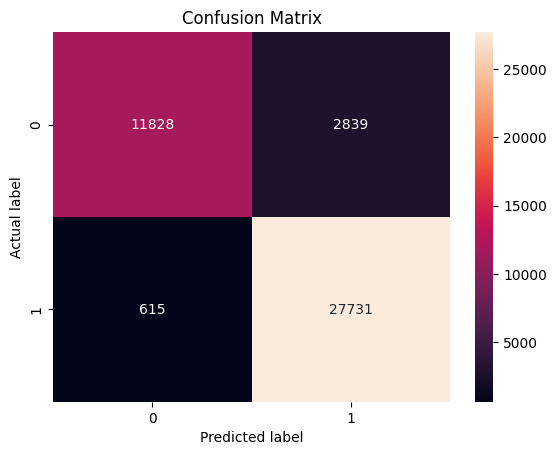

In [ ]:
# Assuming y_test and y_pred are already defined from the model evaluation code above

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


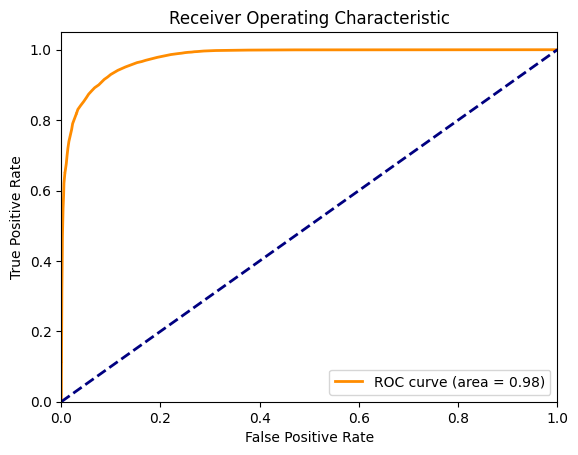

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

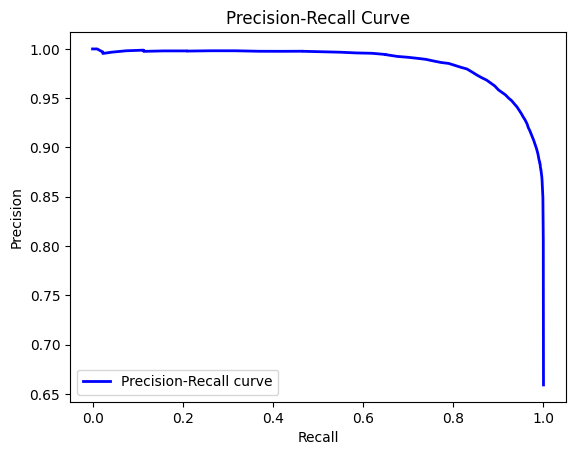

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

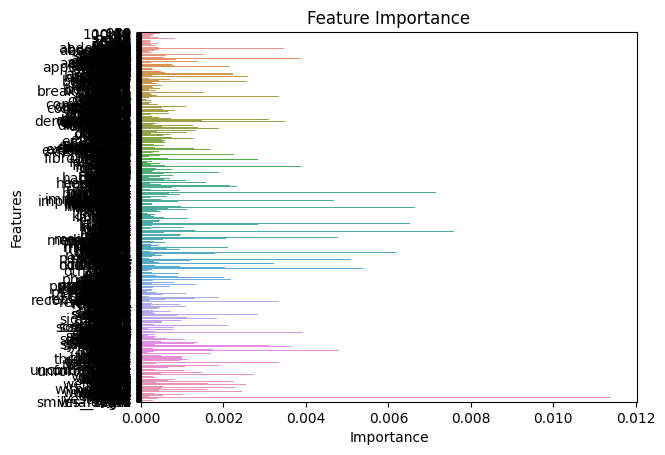

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming you have a dataset (X_train, y_train)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Assuming 'all_feature_names' is a list of feature names
sns.barplot(x=feature_importances, y=all_feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
